In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import KFold, StratifiedKFold
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir('../Dataset/Train')
os.getcwd()

'/Users/benedettosimone/Desktop/CASA/LipNet-1/Dataset/Train'

In [3]:
data=[]
for l in os.listdir():
    if '.DS_Store' not in l:
        os.chdir(l)
        for m in os.listdir():
            data.append([l+'/'+m, l])
        os.chdir('..')

In [4]:
data

[['r/F01_words08_06.jpg', 'r'],
 ['r/F09_words08_07.jpg', 'r'],
 ['r/M07_words08_02.jpg', 'r'],
 ['r/M01_words08_05.jpg', 'r'],
 ['r/F08_words08_03.jpg', 'r'],
 ['r/F07_words08_01.jpg', 'r'],
 ['r/M01_words08_10.jpg', 'r'],
 ['r/M01_words08_04.jpg', 'r'],
 ['r/F08_words08_02.jpg', 'r'],
 ['r/M07_words08_03.jpg', 'r'],
 ['r/F09_words08_06.jpg', 'r'],
 ['r/M08_words08_01.jpg', 'r'],
 ['r/F01_words08_07.jpg', 'r'],
 ['r/F09_words08_04.jpg', 'r'],
 ['r/F01_words08_05.jpg', 'r'],
 ['r/M08_words08_03.jpg', 'r'],
 ['r/F09_words08_10.jpg', 'r'],
 ['r/M07_words08_01.jpg', 'r'],
 ['r/M01_words08_06.jpg', 'r'],
 ['r/F07_words08_02.jpg', 'r'],
 ['r/F07_words08_03.jpg', 'r'],
 ['r/F08_words08_01.jpg', 'r'],
 ['r/M01_words08_07.jpg', 'r'],
 ['r/F01_words08_04.jpg', 'r'],
 ['r/M08_words08_02.jpg', 'r'],
 ['r/F09_words08_05.jpg', 'r'],
 ['r/F01_words08_10.jpg', 'r'],
 ['r/F09_words08_01.jpg', 'r'],
 ['r/M08_words08_06.jpg', 'r'],
 ['r/M07_words08_04.jpg', 'r'],
 ['r/M07_words08_10.jpg', 'r'],
 ['r/M01

In [5]:
os.getcwd()

'/Users/benedettosimone/Desktop/CASA/LipNet-1/Dataset/Train'

In [6]:
import csv
os.chdir('../../codes')
header = ['filename', 'label']

with open('training_labels.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(data)

In [7]:
train_data = pd.read_csv('training_labels.csv')
Y = train_data[['label']]

kf = KFold(n_splits = 5)

skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True)

In [8]:
idg = ImageDataGenerator(rescale=1./255)

In [9]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

In [10]:
def create_new_model():
    import os
    import numpy as np
    from keras.models import Sequential # To initialise the nn as a sequence of layers
    from keras.layers import Convolution2D # To make the convolution layer for 2D images
    from keras.layers import MaxPooling2D #
    from keras.layers import Flatten
    from keras.layers import Dense
    from keras.layers import Dropout
    from keras.callbacks import CSVLogger
    from tensorflow.keras.optimizers import RMSprop
    from keras.layers import BatchNormalization
    from tensorflow.keras.optimizers import Adam
    from keras.models import load_model
    from keras.callbacks import ModelCheckpoint
    from keras.layers import Activation
    from keras.layers import GlobalAveragePooling2D

    
    csv = CSVLogger("2_adam.log")
    #filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
    #checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    # Initialising the CNN
    classifier = Sequential()

    # Step 1 - Convolution
    classifier.add(Convolution2D(32, (2, 2), input_shape=(224, 224, 1), activation='relu', strides=2, name='convo1'))
    classifier.add(Convolution2D(64, (3, 3), activation='relu', name='convo2'))
    # Step 1 - Pooling
    classifier.add(MaxPooling2D(pool_size=(2, 2)))

    # Step 2 - Convolution
    classifier.add(Convolution2D(64, (3, 3), activation='relu', name='convo3'))
    # Step 2 - Pooling
    classifier.add(MaxPooling2D(pool_size=(2, 2)))
    # Step 3 - Convolution
    classifier.add(Convolution2D(64, (3, 3), activation='relu', name='convo4'))
    # Step 3 - Pooling
    classifier.add(MaxPooling2D(pool_size=(2, 2)))
    #Step 4 - Flattening

    classifier.add(Flatten())

    classifier.add(BatchNormalization())
    classifier.add(Dropout((0.5)))
    classifier.add(Dense(1024, activation='relu'))

    '''classifier.add(BatchNormalization())
    classifier.add(Dropout((0.5)))
    classifier.add(Dense(512, activation = 'relu'))
    '''

    classifier.add(BatchNormalization())
    classifier.add(Dropout((0.4)))
    classifier.add(Dense(20, activation='softmax'))

    return classifier




/opt/anaconda3/lib/python3.9/site-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(
2022-01-12 17:56:42.502470: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 2080 validated image filenames belonging to 20 classes.
Found 520 validated image filenames belonging to 20 classes.
Epoch 1/20
65/65 [==============================] - ETA: 0s - loss: 3.3566 - accuracy: 0.1620
Epoch 00001: val_accuracy improved from -inf to 0.05000, saving model to saved_models(20epoch)/model_1.h5
65/65 [==============================] - 45s 678ms/step - loss: 3.3566 - accuracy: 0.1620 - val_loss: 2.9493 - val_accuracy: 0.0500
Epoch 2/20
65/65 [==============================] - ETA: 0s - loss: 2.0955 - accuracy: 0.4000
Epoch 00002: val_accuracy improved from 0.05000 to 0.05192, saving model to saved_models(20epoch)/model_1.h5
65/65 [==============================] - 46s 704ms/step - loss: 2.0955 - accuracy: 0.4000 - val_loss: 2.9246 - val_accuracy: 0.0519
Epoch 3/20
65/65 [==============================] - ETA: 0s - loss: 1.4052 - accuracy: 0.5678
Epoch 00003: val_accuracy improved from 0.05192 to 0.20577, saving model to saved_models(20epoch)/model_1.h5
65/65 [

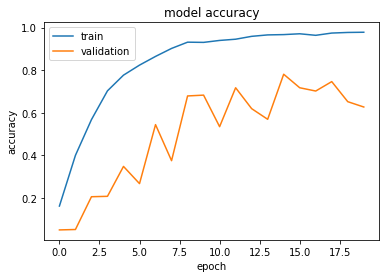

Found 2079 validated image filenames belonging to 20 classes.


/opt/anaconda3/lib/python3.9/site-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 2 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Found 521 validated image filenames belonging to 20 classes.
Epoch 1/20
65/65 [==============================] - ETA: 0s - loss: 3.3819 - accuracy: 0.1573
Epoch 00001: val_accuracy improved from -inf to 0.09789, saving model to saved_models(20epoch)/model_2.h5
65/65 [==============================] - 48s 732ms/step - loss: 3.3819 - accuracy: 0.1573 - val_loss: 2.9689 - val_accuracy: 0.0979
Epoch 2/20
65/65 [==============================] - ETA: 0s - loss: 2.0952 - accuracy: 0.4002
Epoch 00002: val_accuracy did not improve from 0.09789
65/65 [==============================] - 45s 696ms/step - loss: 2.0952 - accuracy: 0.4002 - val_loss: 2.9690 - val_accuracy: 0.0518
Epoch 3/20
65/65 [==============================] - ETA: 0s - loss: 1.3303 - accuracy: 0.5964
Epoch 00003: val_accuracy improved from 0.09789 to 0.13244, saving model to saved_models(20epoch)/model_2.h5
65/65 [==============================] - 45s 695ms/step - loss: 1.3303 - accuracy: 0.5964 - val_loss: 2.9253 - val_accuracy

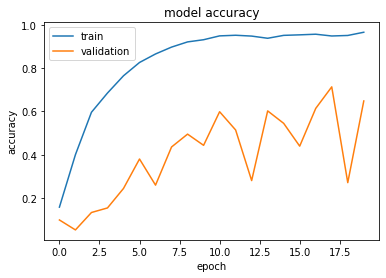

Found 2080 validated image filenames belonging to 20 classes.
Found 520 validated image filenames belonging to 20 classes.
Epoch 1/20
65/65 [==============================] - ETA: 0s - loss: 3.2940 - accuracy: 0.1688
Epoch 00001: val_accuracy improved from -inf to 0.07308, saving model to saved_models(20epoch)/model_3.h5
65/65 [==============================] - 46s 700ms/step - loss: 3.2940 - accuracy: 0.1688 - val_loss: 2.9665 - val_accuracy: 0.0731
Epoch 2/20
65/65 [==============================] - ETA: 0s - loss: 2.1162 - accuracy: 0.3971
Epoch 00002: val_accuracy improved from 0.07308 to 0.09423, saving model to saved_models(20epoch)/model_3.h5
65/65 [==============================] - 45s 694ms/step - loss: 2.1162 - accuracy: 0.3971 - val_loss: 2.9207 - val_accuracy: 0.0942
Epoch 3/20
65/65 [==============================] - ETA: 0s - loss: 1.5219 - accuracy: 0.5394
Epoch 00003: val_accuracy improved from 0.09423 to 0.11923, saving model to saved_models(20epoch)/model_3.h5
65/65 [

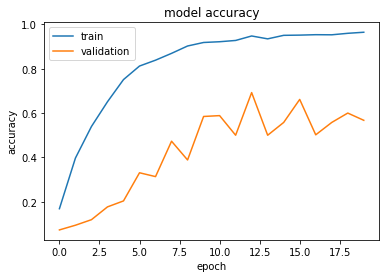

Found 2081 validated image filenames belonging to 20 classes.
Found 519 validated image filenames belonging to 20 classes.
Epoch 1/20
66/66 [==============================] - ETA: 0s - loss: 3.2961 - accuracy: 0.1764
Epoch 00001: val_accuracy improved from -inf to 0.11753, saving model to saved_models(20epoch)/model_4.h5
66/66 [==============================] - 47s 700ms/step - loss: 3.2961 - accuracy: 0.1764 - val_loss: 2.9215 - val_accuracy: 0.1175
Epoch 2/20
66/66 [==============================] - ETA: 0s - loss: 2.0387 - accuracy: 0.4123
Epoch 00002: val_accuracy did not improve from 0.11753
66/66 [==============================] - 45s 683ms/step - loss: 2.0387 - accuracy: 0.4123 - val_loss: 2.9104 - val_accuracy: 0.0617
Epoch 3/20
66/66 [==============================] - ETA: 0s - loss: 1.3919 - accuracy: 0.5790
Epoch 00003: val_accuracy did not improve from 0.11753
66/66 [==============================] - 45s 685ms/step - loss: 1.3919 - accuracy: 0.5790 - val_loss: 2.9386 - val_

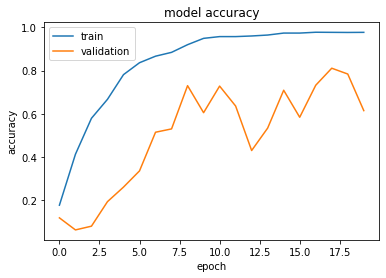

Found 2080 validated image filenames belonging to 20 classes.
Found 520 validated image filenames belonging to 20 classes.
Epoch 1/20
65/65 [==============================] - ETA: 0s - loss: 3.2562 - accuracy: 0.1707
Epoch 00001: val_accuracy improved from -inf to 0.08269, saving model to saved_models(20epoch)/model_5.h5
65/65 [==============================] - 46s 698ms/step - loss: 3.2562 - accuracy: 0.1707 - val_loss: 2.9293 - val_accuracy: 0.0827
Epoch 2/20
65/65 [==============================] - ETA: 0s - loss: 2.0482 - accuracy: 0.4120
Epoch 00002: val_accuracy did not improve from 0.08269
65/65 [==============================] - 45s 693ms/step - loss: 2.0482 - accuracy: 0.4120 - val_loss: 3.0074 - val_accuracy: 0.0673
Epoch 3/20
65/65 [==============================] - ETA: 0s - loss: 1.3315 - accuracy: 0.5861
Epoch 00003: val_accuracy improved from 0.08269 to 0.12885, saving model to saved_models(20epoch)/model_5.h5
65/65 [==============================] - 45s 695ms/step - los

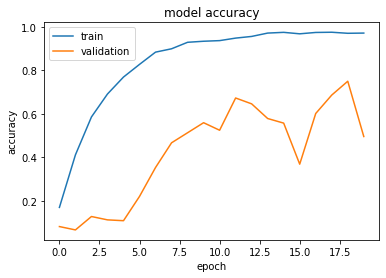

In [11]:
VALIDATION_ACCURACY = []
VALIDATION_LOSS = []

save_dir = 'saved_models(20epoch)/'
fold_var = 1

for train_index, val_index in skf.split(np.zeros(2602),Y):
    training_data = train_data.iloc[train_index]
    validation_data = train_data.iloc[val_index]

    train_data_generator = idg.flow_from_dataframe(training_data, directory = '../Dataset/Train',
                               x_col = "filename", y_col = "label",
                               class_mode = "categorical", shuffle = True, color_mode="grayscale",target_size=(224,224),batchsize=32)
    valid_data_generator  = idg.flow_from_dataframe(validation_data, directory =  '../Dataset/Train',
                            x_col = "filename", y_col = "label",
                            class_mode = "categorical", shuffle = True, color_mode="grayscale",target_size=(224,224),batchsize=32)

    # CREATE NEW MODEL
    model = create_new_model()
    # COMPILE NEW MODEL
    model.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

    # CREATE CALLBACKS
    checkpoint = tf.keras.callbacks.ModelCheckpoint(save_dir+get_model_name(fold_var),
                            monitor='val_accuracy', verbose=1,
                            save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    # There can be other callbacks, but just showing one because it involves the model name
    # This saves the best model
    # FIT THE MODEL
    h = model.fit(train_data_generator,
                epochs=20,
                callbacks=callbacks_list,
                validation_data=valid_data_generator)
    #PLOT HISTORY
    #:
    #:

    # LOAD BEST MODEL to evaluate the performance of the model
    model.load_weights("saved_models(20epoch)/model_"+str(fold_var)+".h5")
    

    results = model.evaluate(valid_data_generator)
    results = dict(zip(model.metrics_names,results))

    VALIDATION_ACCURACY.append(results['accuracy'])
    VALIDATION_LOSS.append(results['loss'])

    plt.plot(h.history['accuracy']) #validation
    plt.plot(h.history['val_accuracy']) #train
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    tf.keras.backend.clear_session()

    fold_var += 1

In [12]:
VALIDATION_ACCURACY

[0.7807692289352417,
 0.7140114903450012,
 0.692307710647583,
 0.8111753463745117,
 0.75]

In [13]:
VALIDATION_LOSS

[0.7464186549186707,
 1.158299207687378,
 1.0333466529846191,
 0.6413535475730896,
 0.9478245973587036]